<a href="https://www.kaggle.com/sinoro12/auto-eda-instant-cluster-analysis-kmeans-agglo?scriptVersionId=89119234" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://imgflip.com/i/5mx3uj"><img src="https://i.imgflip.com/5mx3uj.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

Do you want to see the power of **auto eda**, have an **elbow plot**, a **dendrogram** and perform **k-means** and **hierarchical clustering** in one go? Then you are on the right place!

# Importing Data

In [1]:
#imports for data analysis and wrangling
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering 

#Importing data
customer = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Auto EDA

I got the code from this website http://theautomatic.net/2021/07/02/automated-eda-with-python/

**If you want to check for the following then use the code below**
1. Missing cells, duplicate rows, variable types
2. Univariate analysis of variables
3. Interaction and correlation between variables
4. First and last 10 rows of the dataframe

In [2]:
# Importing pandas_profiling
import pandas_profiling
# Using pandas_profiling and storing it to profile_report
profile_report = pandas_profiling.ProfileReport(customer)
# Output
profile_report 

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**If you want to see the summary statistic of each variable use the code below:**

In [3]:
# Installing sweetviz
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.4 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


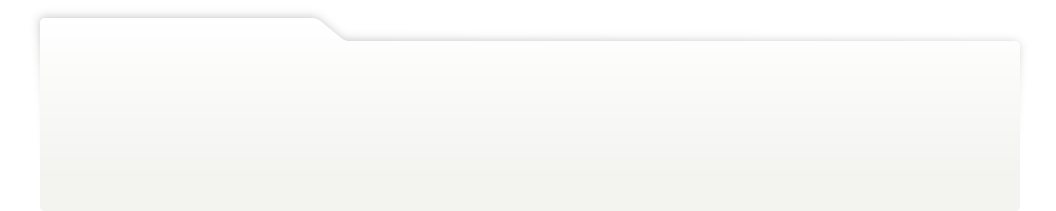
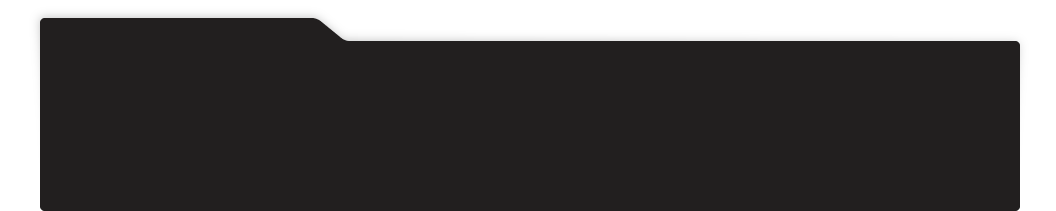
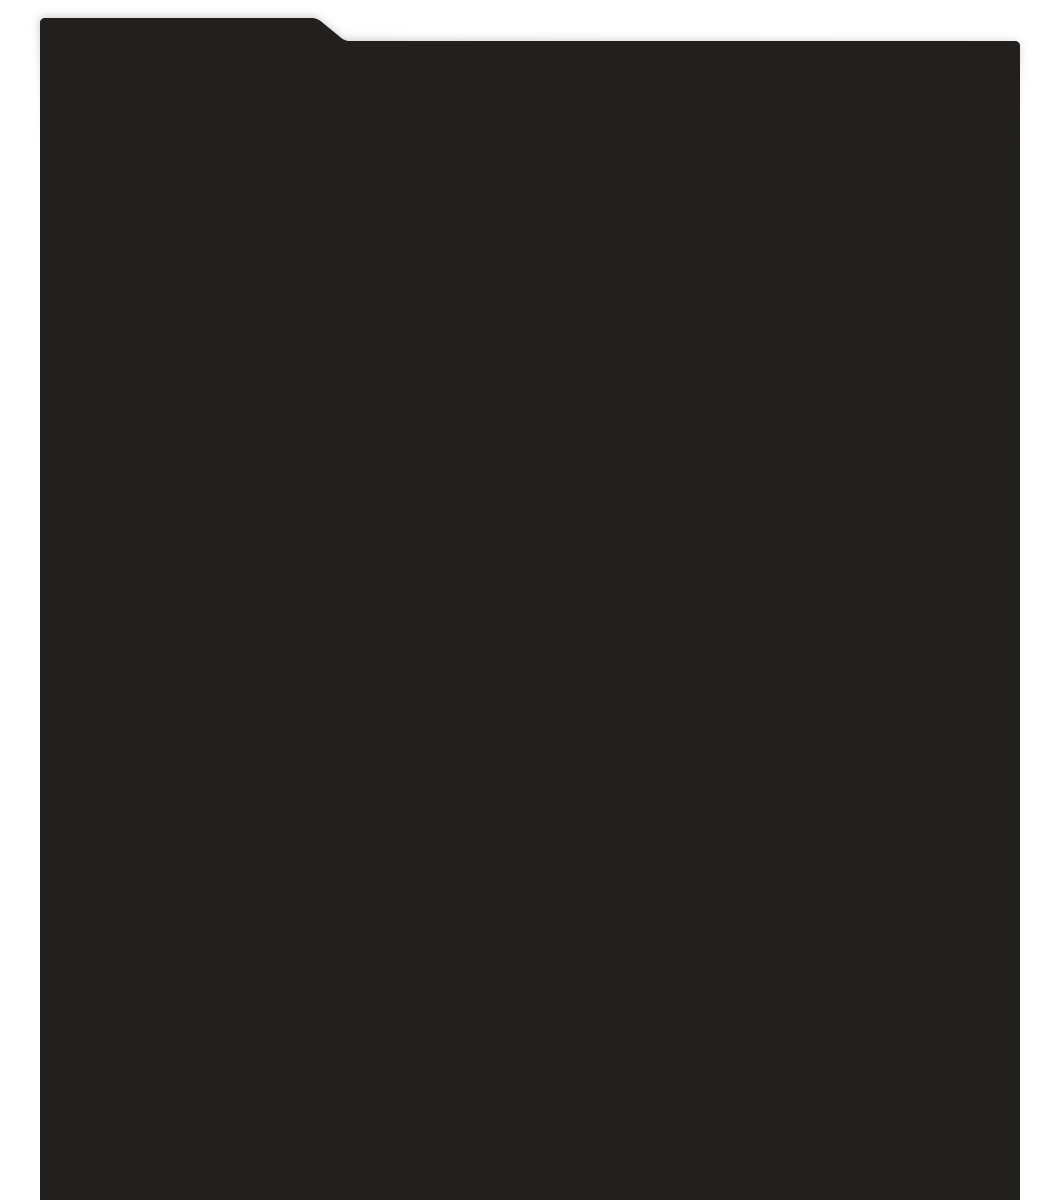
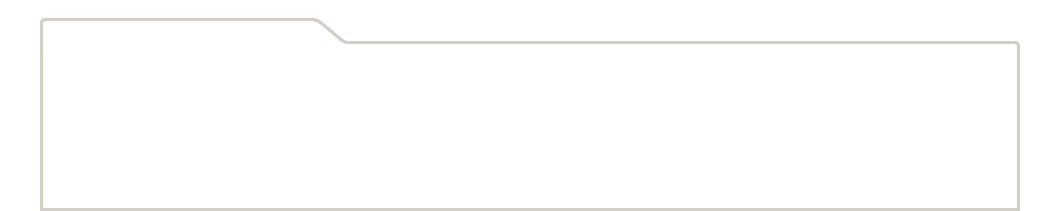
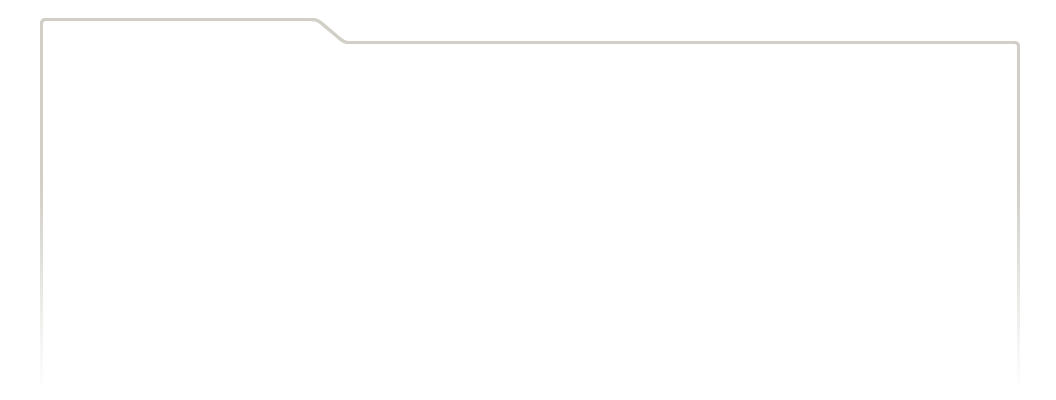
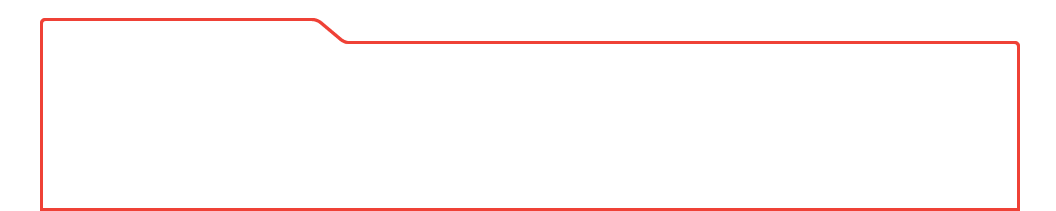
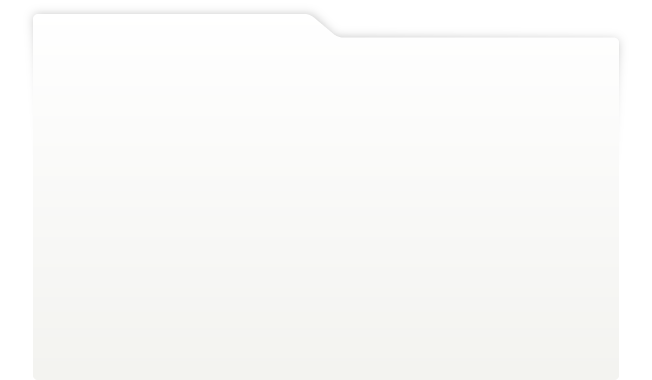
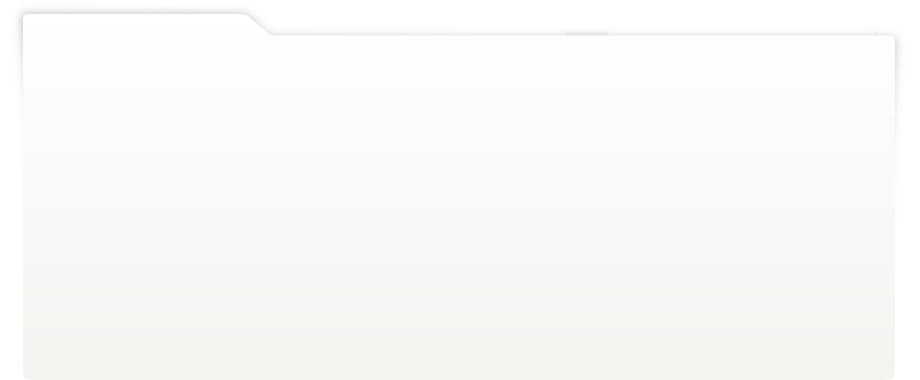
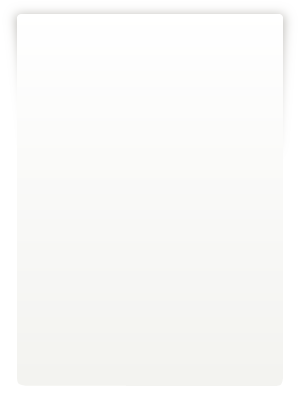
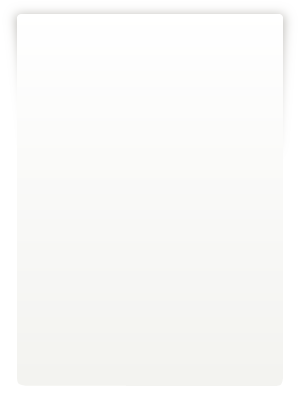
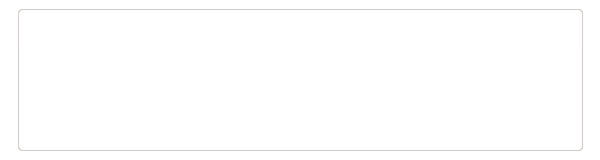
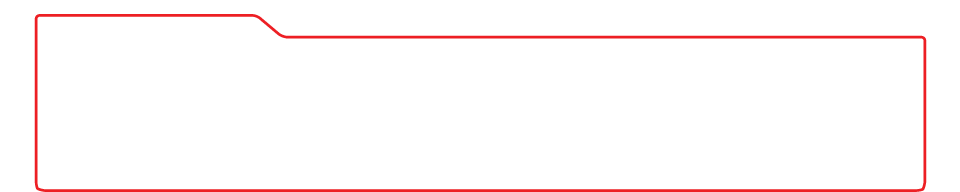
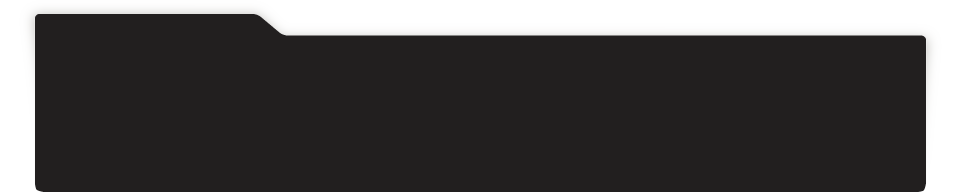
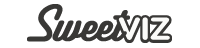
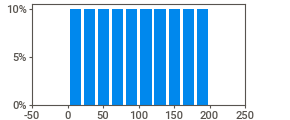
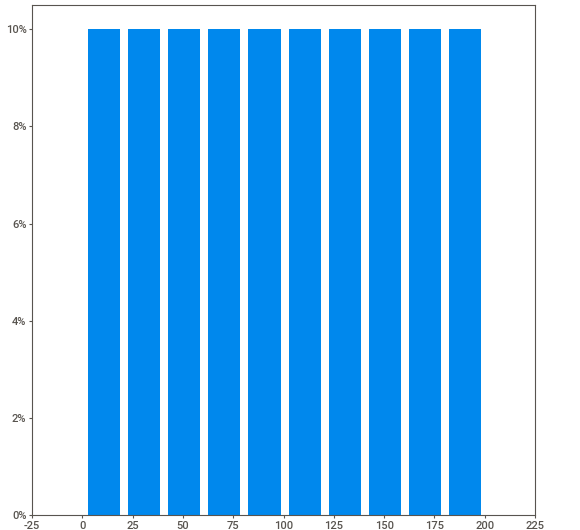
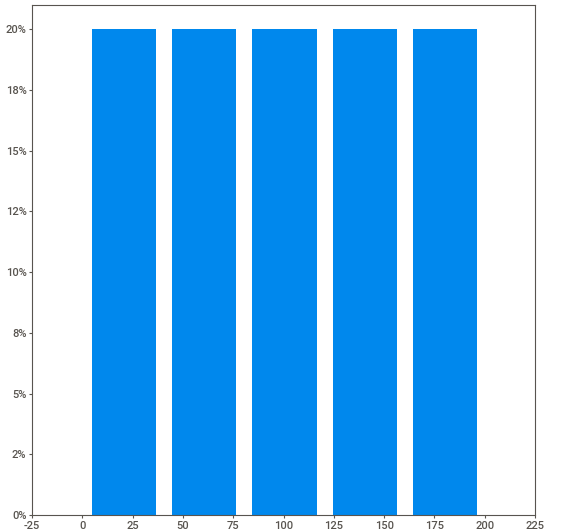
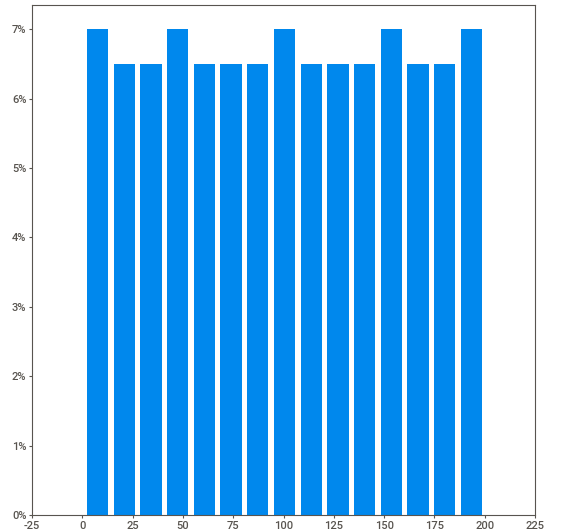
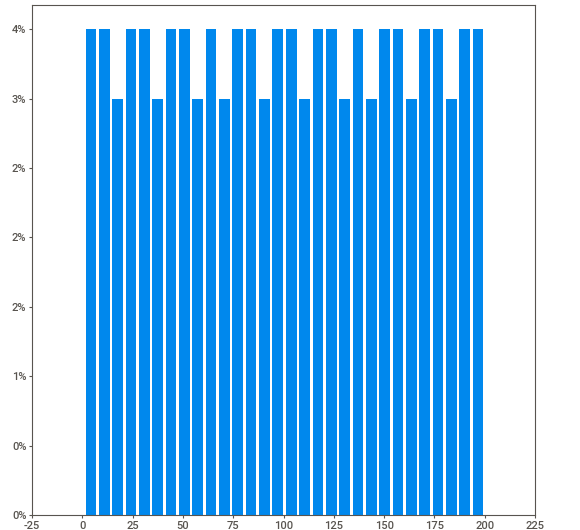
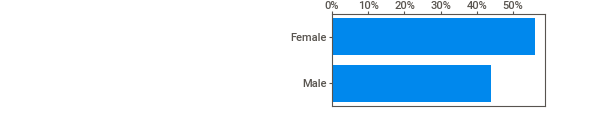
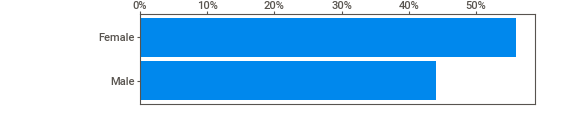
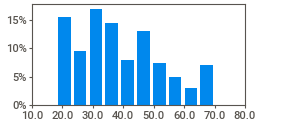
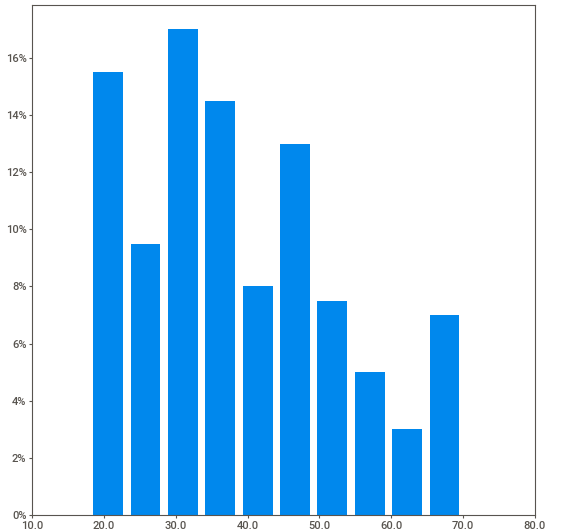
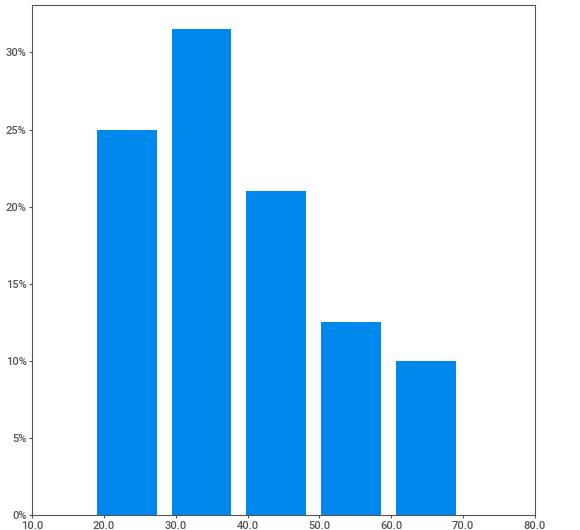
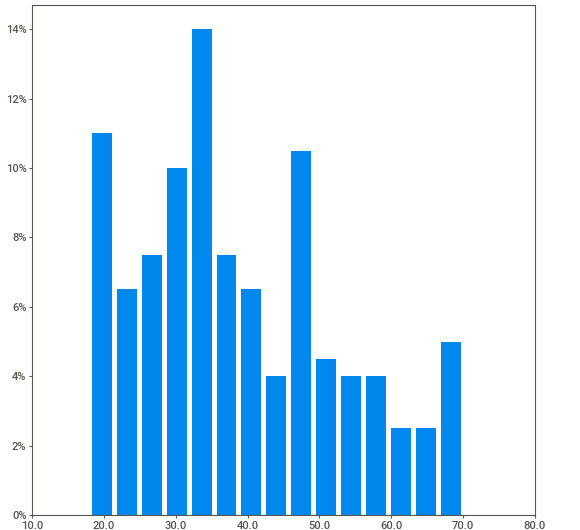
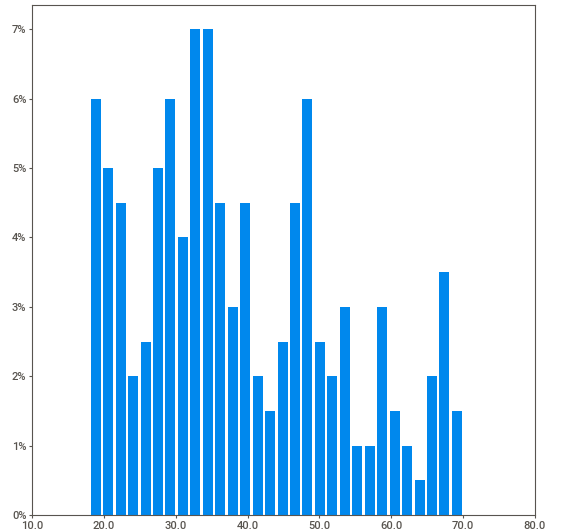
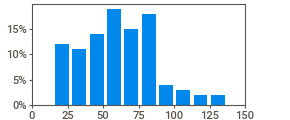
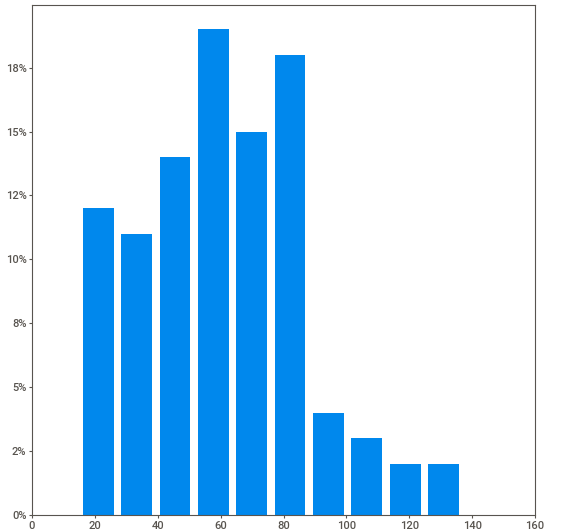
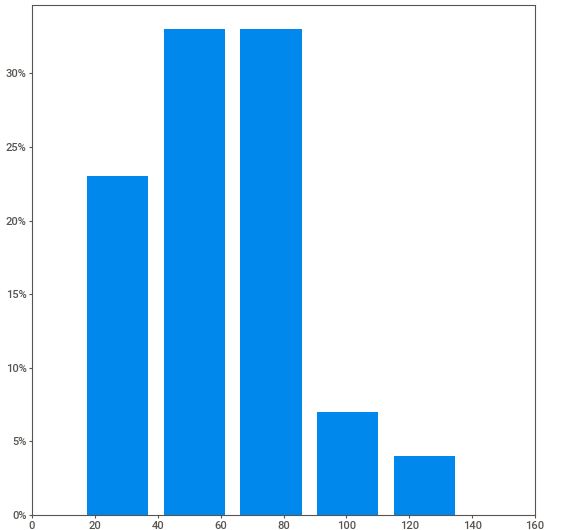
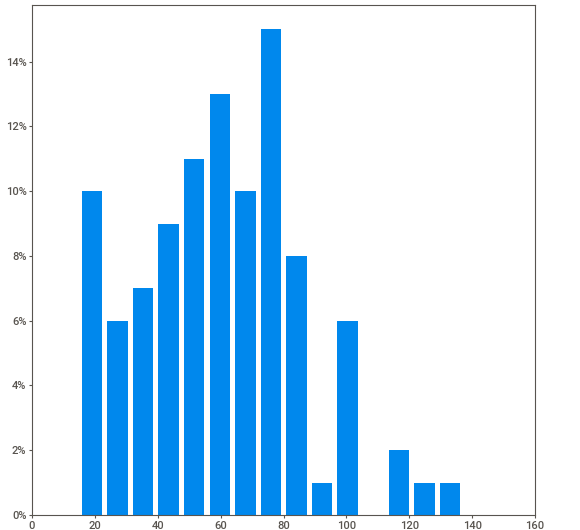
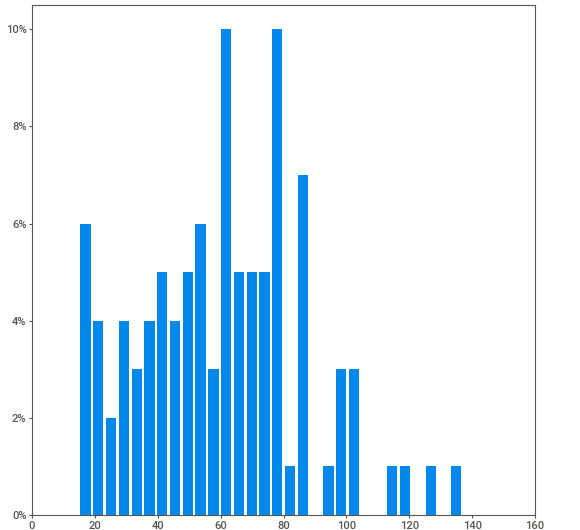
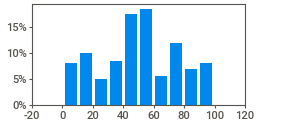
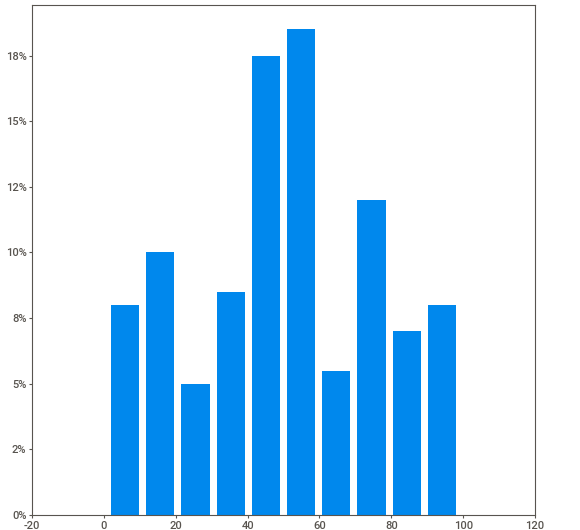
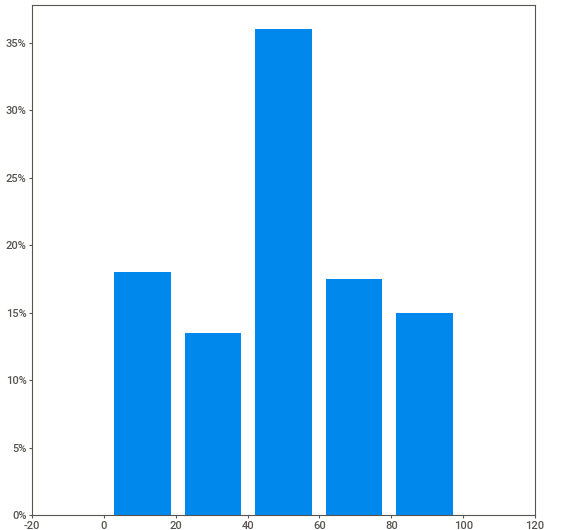
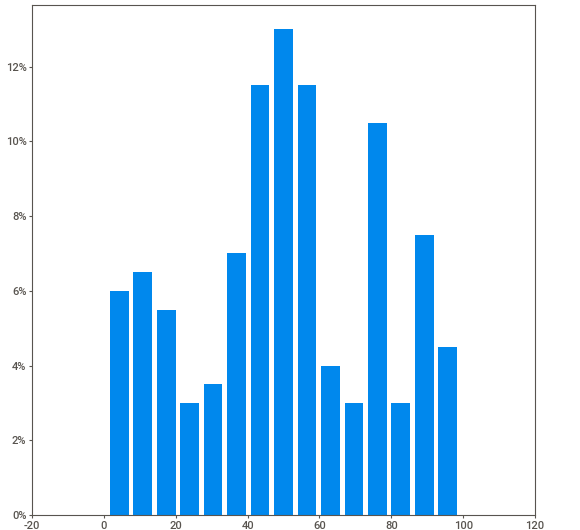
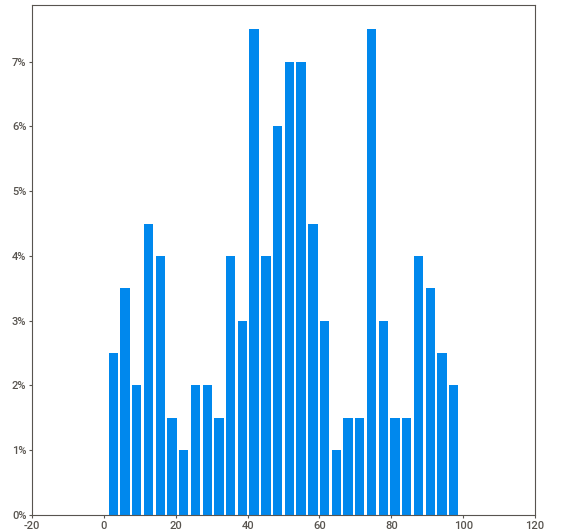
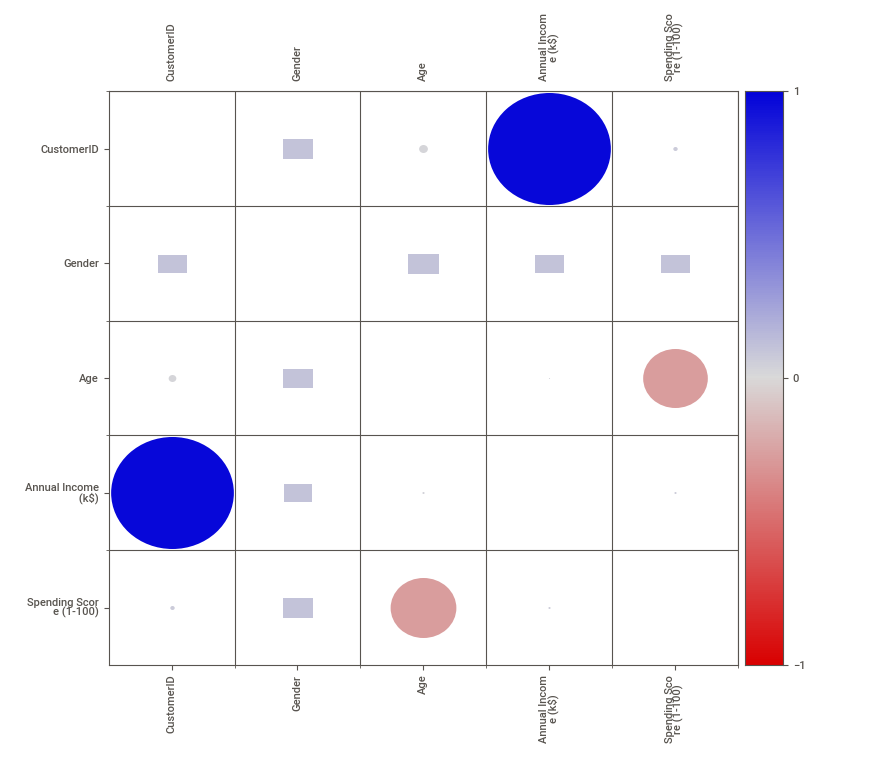
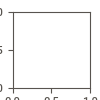

In [4]:
# importing sweetviz
import sweetviz as sv
 
# generate report
sweet_report = sv.analyze(customer)
 
# show the output
sweet_report.show_notebook()

# Functions for Clustering

Before I share my code, I want to say that I got some of the code from these courses in Datacamp and to this Kaggle Notebook. You may want to check them.

1. Kaggle Notebook -> https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms
2. Unsupervised Learning in Python -> https://learn.datacamp.com/courses/unsupervised-learning-in-python
3. CLuster Analysis in Python -> https://learn.datacamp.com/courses/cluster-analysis-in-python


**1. Elbow Plot using K Means**

In [5]:
def elbow(df,x,y):
    """Creates an elbow plot using the K Means model
    Args:
        df: Dataframe to be used
        x: Variable to be plotted on the x-axis, MUST BE A STRING
        y: Variable to be plotted on the y-axis, MUST BE A STRING"""  
    #Declaring variables for use
    inertia = []
    num_clusters = range(1,11)

    # Populating inertia for various clusters
    for i in num_clusters:
        # Create a KMeans instance with k clusters
        model = KMeans(n_clusters = i)
        # Fit model to samples
        model.fit(df[[x,y]])
        #Append the inertia to the list of inertias
        inertia.append(model.inertia_)
    
    # Plot ks vs inertias
    plt.plot(num_clusters, inertia, '-o')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.title("Elbow Plot of " + x + " and " + y)
    plt.xticks(num_clusters)
    plt.show()



**2.Visualzing Clusters with K Means**

In [6]:
def kmeans(df,x,y,num):
    """Performs k means clustering that is visualized through a scatterplot.
    Args:
        df: Dataframe to be used
        x: Variable to be plotted on the x-axis, MUST BE A STRING
        y: Variable to be plotted on the y-axis, MUST BE A STRING
        num: Number of clusters you want to have"""
    
    # Fitting the model on the dataframe based on the number of clusters    
    km = KMeans(n_clusters=num).fit(df[[x,y]])
    
    #Creates a new column on the dataframe which are the clusters created
    df['labels' + "_" + x] = km.labels_
    
    #Setting up the size of plot
    plt.figure(figsize=(12, 8))
    
    #Uncomment this and the make the sns.scatterplot a comment if you want to have multiple scatterplots based 
    #on a variable     
#     sns.relplot(data = df, x = x, y = y, kind ='scatter', hue = 'labels'+ "_" + x, col = 'Gender',
#                 palette='colorblind')

    #Scatterplot btw I removed the legend since I want to add some annotations
    sns.scatterplot(x=df[x],y=df[y], hue=df['labels' + "_" + x], palette='colorblind')
    
    #Title
    plt.title(str(num) + " Clusters Formed Based on the Relationship Between " + x + " and " + y )
    
    #Output 
    plt.show()


**3. Dendrogram**

To see what linkage method to use, go to **"Dendrograms and Hierarchical Agglomerative Cluster Analysis"** section.

In [7]:
def dgram(df,x,y,method):
    """Creates a dendrogram
    Args:
        df: Dataframe to be used
        x: Variable to be plotted on the x-axis, MUST BE A STRING
        y: Variable to be plotted on the y-axis, MUST BE A STRING
      linkage: Method of linkage to be used"""
    
    #Setting up the size of the plot    
    plt.figure(figsize=(18, 50))
    
    #Performs the linkage and is stored in the mergings variable
    mergings = linkage(df[[x, y]], method=method)
    
    #Provides the dendrogram, made the orientation equalto right for the reader to see everything
    dendrogram(mergings, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')
    
    #Output
    plt.show()

**4. Visualizing Hierarchical Agglomerative Clustering**

In [8]:
def agg(df,x,y,num,method):
    """Performs hierarchical agglomerative clustering that is visualized through a scatterplot.
    Args:
        df: Dataframe to be used
        x: Variable to be plotted on the x-axis, MUST BE A STRING
        y: Variable to be plotted on the y-axis, MUST BE A STRING
        num: Number of clusters you want to have
        method: Method of linkage to be used"""
      
    # Fitting the model on the dataframe based on the number of clusters    
    ag = AgglomerativeClustering(n_clusters=num, linkage=method).fit(df[[x,y]])
    
    #Creates a new column on the dataframe which are the clusters created
    df[x + "_agglo_" + "_labels_"] = ag.labels_
    
    #Setting up the size of plot
    plt.figure(figsize=(12, 8))
    
    #Scatterplot 
    sns.scatterplot(x=df[x],y=df[y], hue=df[x + "_agglo_" + "_labels_"], palette='colorblind')
    
    #Title
    plt.title(str(num) + " Clusters Formed Based on the Relationship Between " + x + " and " + y )
    
    #Output 
    plt.show()

# Elbow Plot and K Means Clustering

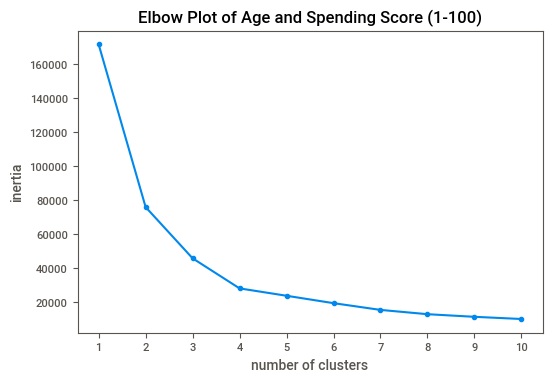

In [9]:
elbow(customer,"Age","Spending Score (1-100)")

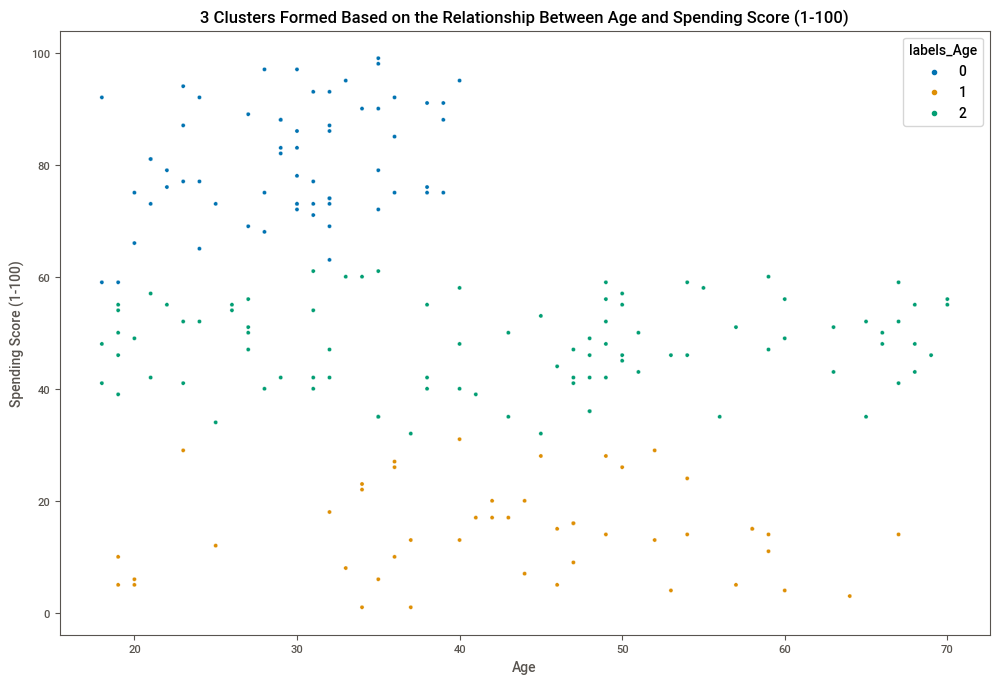

In [10]:
kmeans(customer,"Age","Spending Score (1-100)",3)

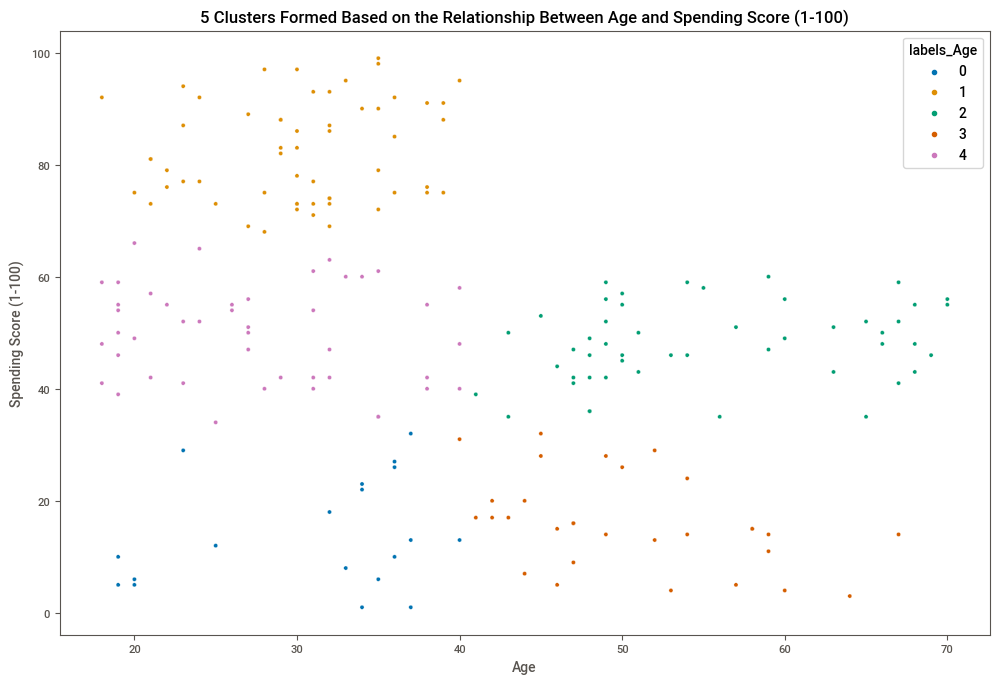

In [11]:
kmeans(customer,"Age","Spending Score (1-100)",5)

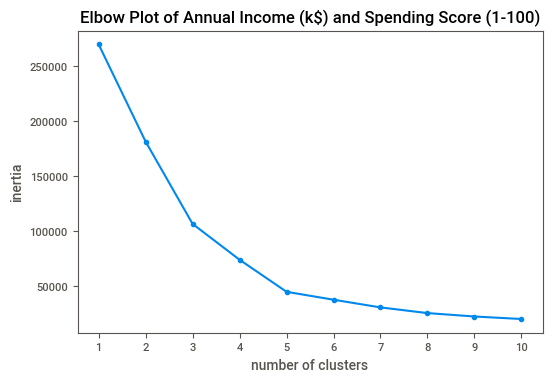

In [12]:
elbow(customer,"Annual Income (k$)","Spending Score (1-100)")

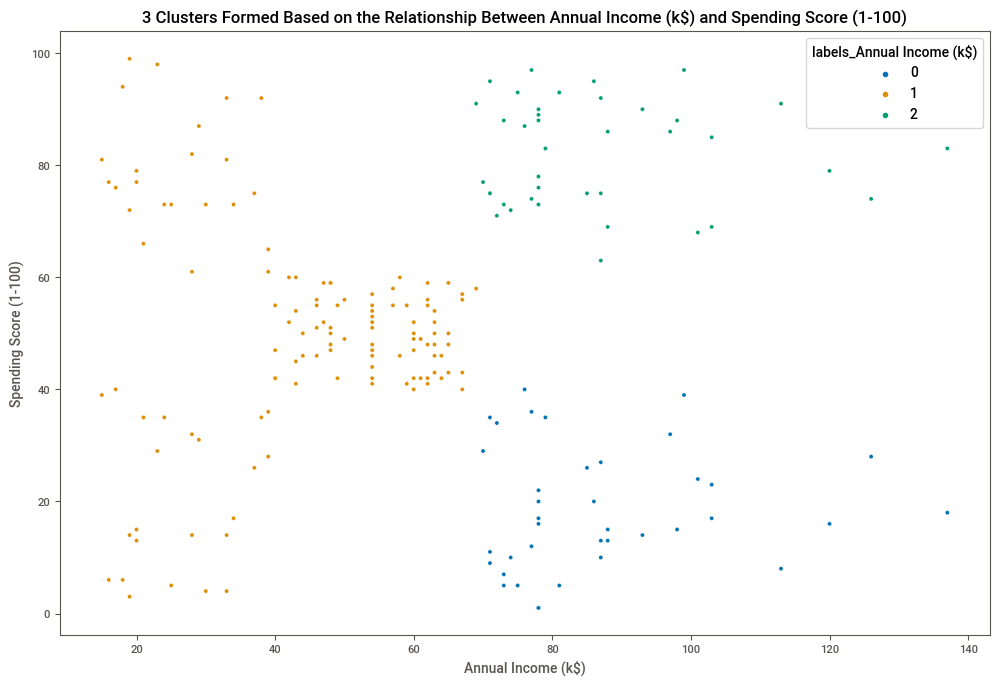

In [13]:
kmeans(customer,"Annual Income (k$)","Spending Score (1-100)",3)

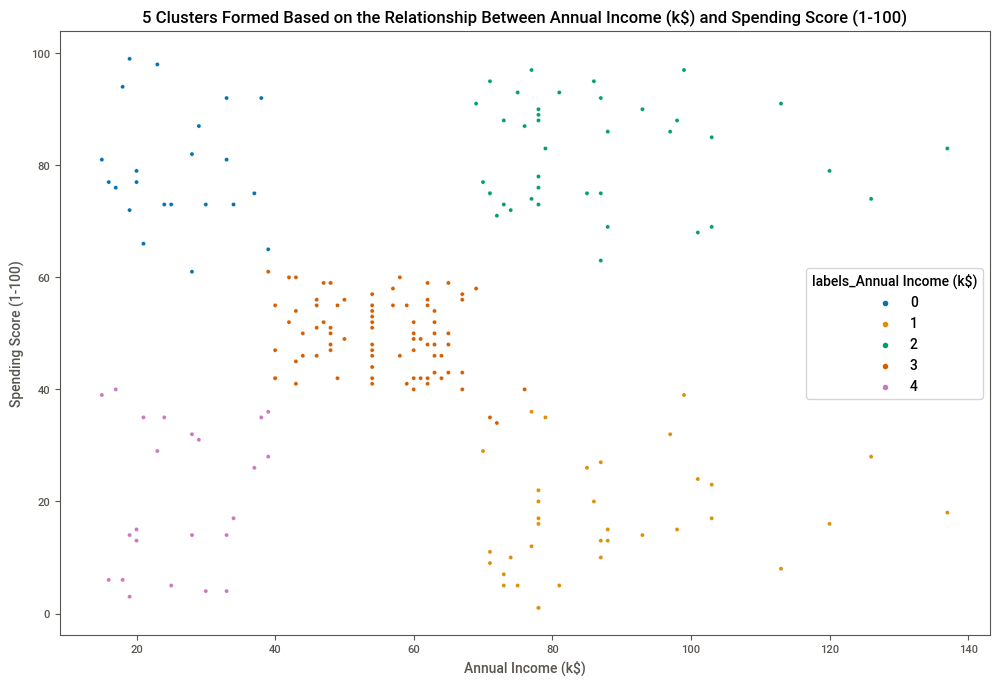

In [14]:
kmeans(customer,"Annual Income (k$)","Spending Score (1-100)",5)

# Dendrograms and Hierarchical Agglomerative Cluster Analysis

**Which linkage method should I use?**

**Short Answers:**

* single: based on two closest objects
* complete: based on two farthest objects
* average: based on the arithmetic mean of all objects
* centroid: based on the geometric mean of all objects
* median: based on the median of all objects
* ward: based on the sum of squares

For **Comprehensive Answers** please check these links:

https://medium.com/@codingpilot25/hierarchical-clustering-and-linkage-explained-in-simplest-way-eef1216f30c5

https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering#217742

Also, if you want to learn how to interpret the **dendrogram**, check this link:

https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=1

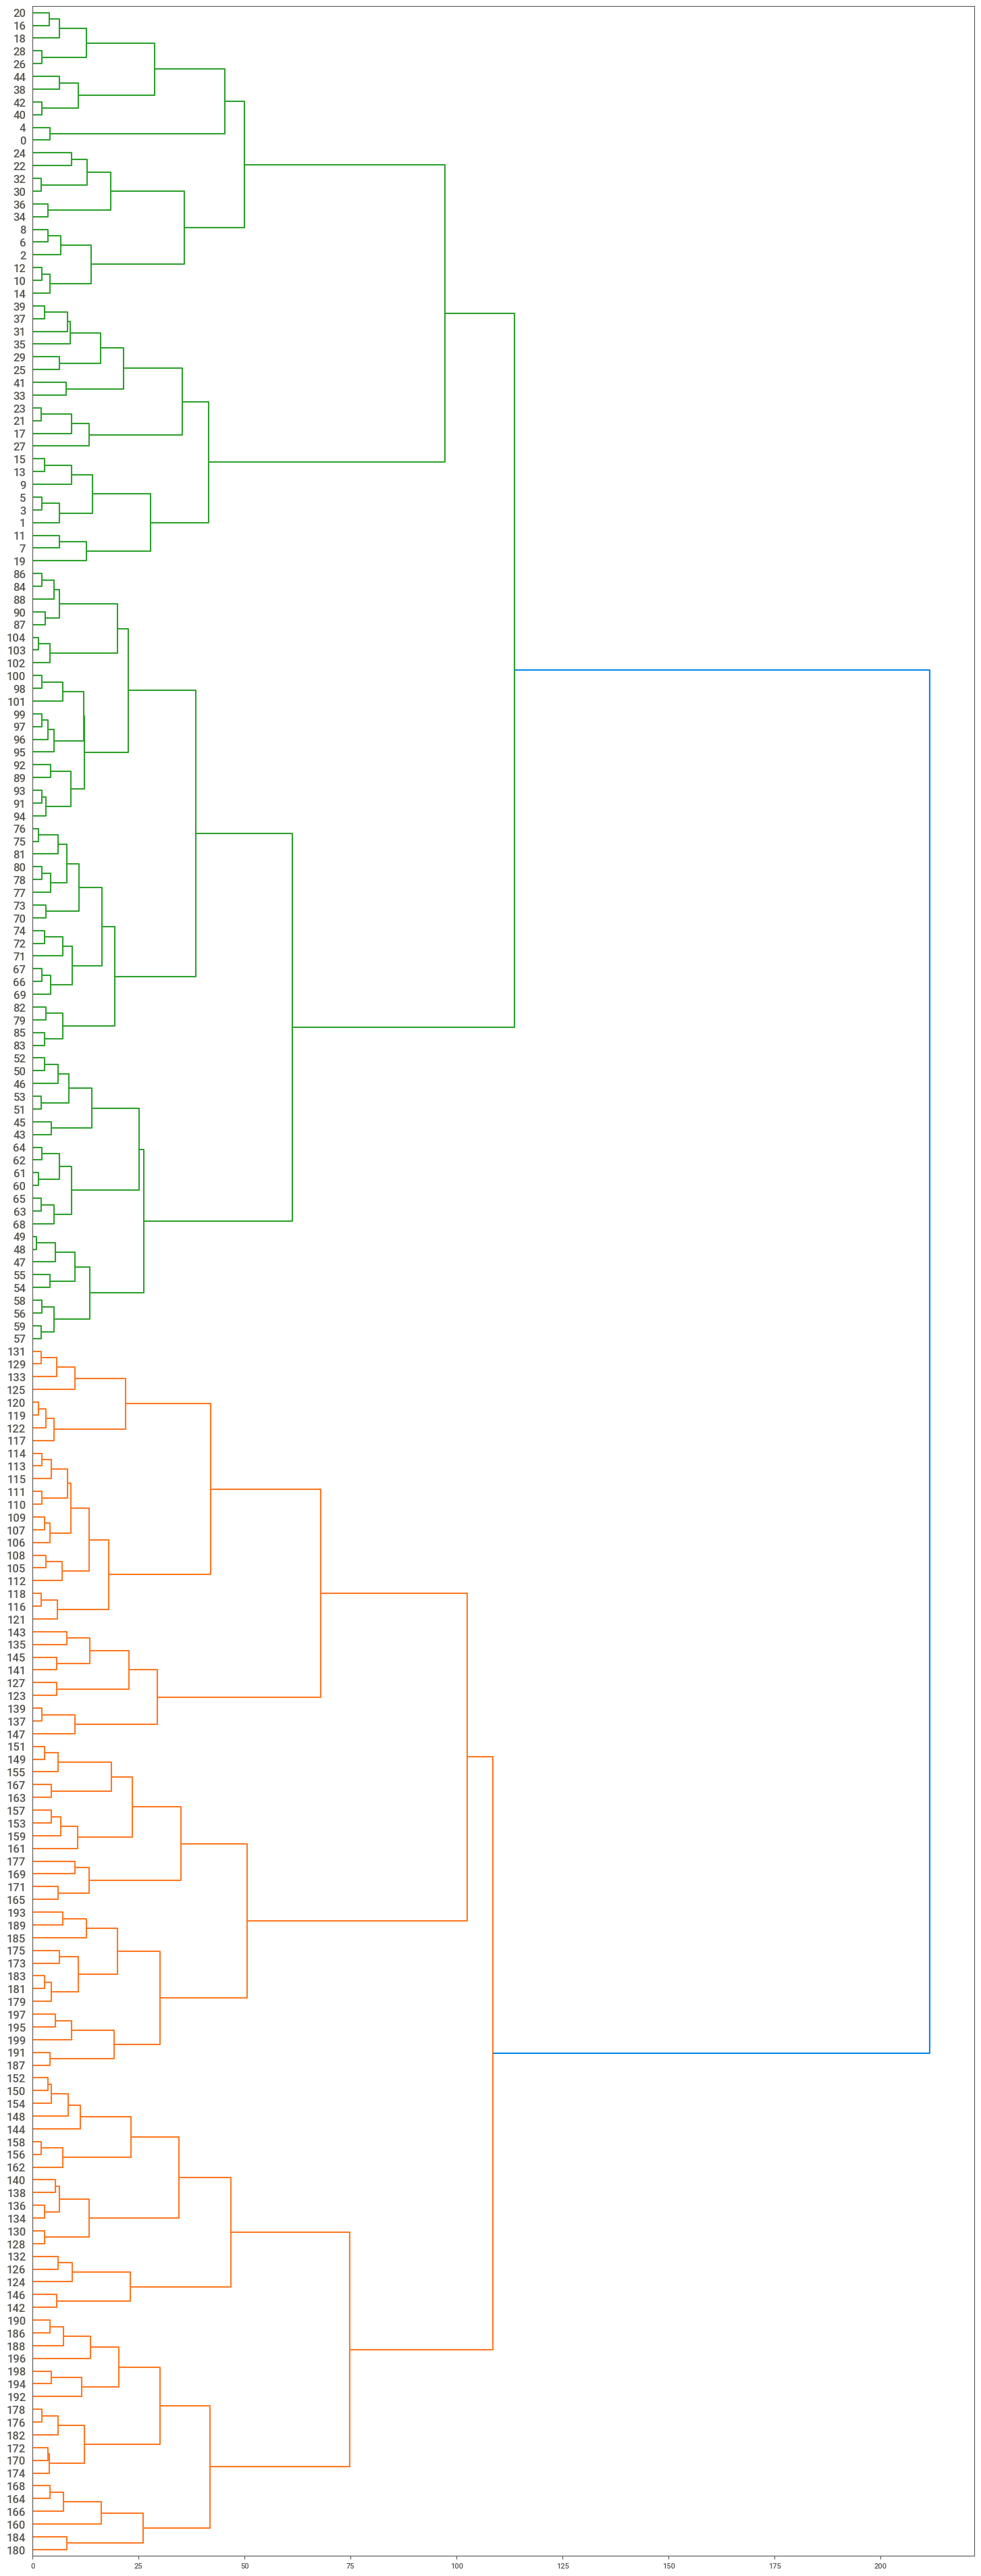

In [15]:
dgram(customer,"CustomerID","Spending Score (1-100)","complete")

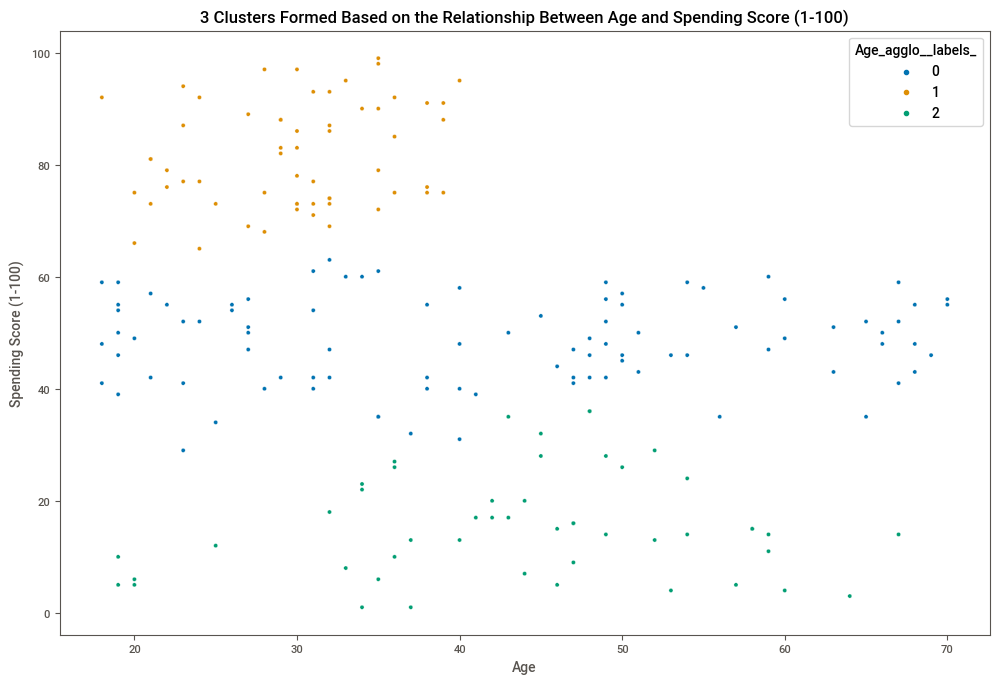

In [16]:
agg(customer,"Age","Spending Score (1-100)",3,"complete")

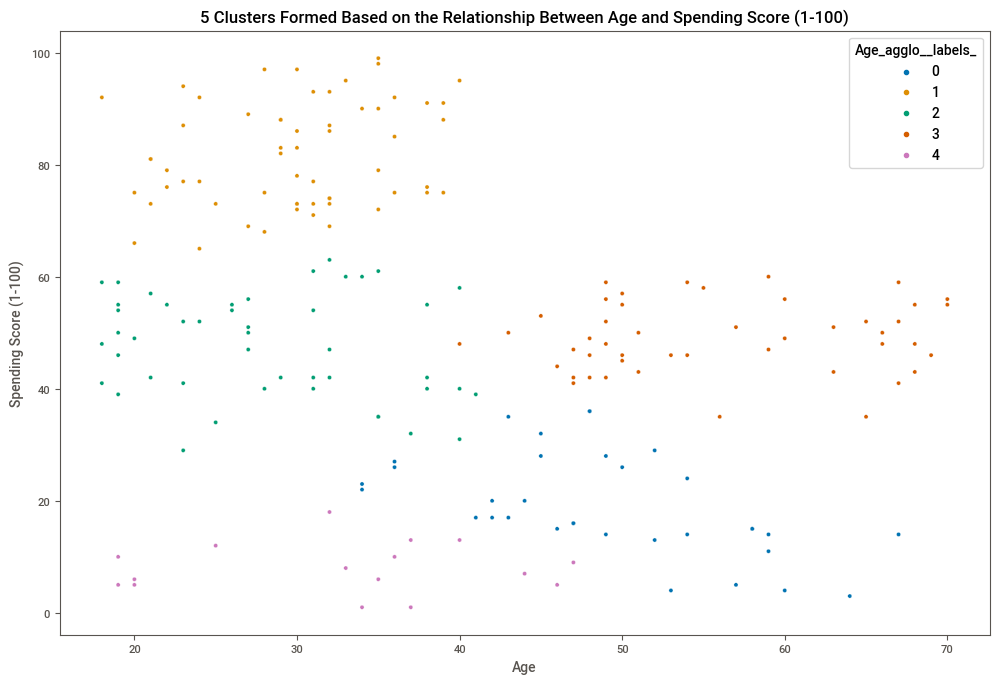

In [17]:
agg(customer,"Age","Spending Score (1-100)",5,"complete")

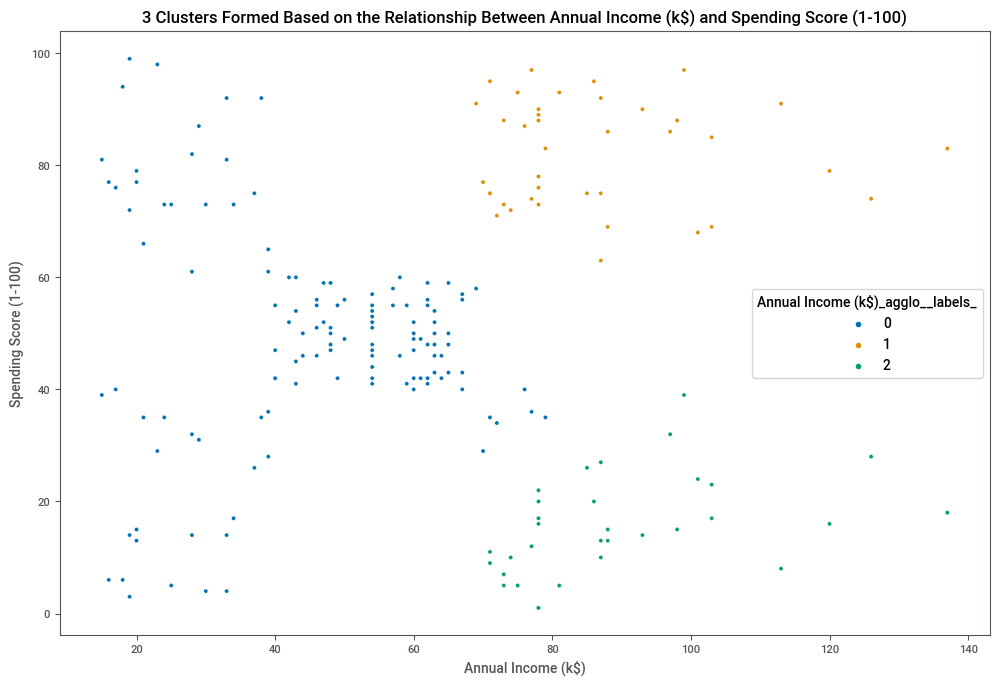

In [18]:
agg(customer,"Annual Income (k$)","Spending Score (1-100)",3,"complete")

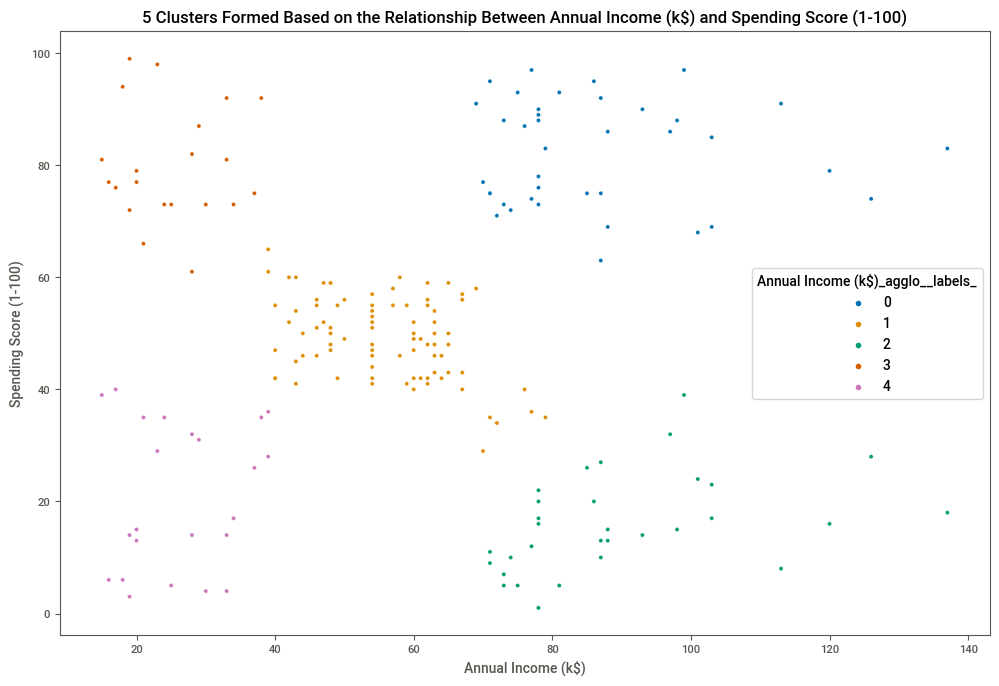

In [19]:
agg(customer,"Annual Income (k$)","Spending Score (1-100)",5,"complete")

**IF YOU MADE THIS FAR, PLEASE CONSIDER GIVING AN UPVOTE!**

**ALSO, COMMENTS, SUGGESTIONS, AND RECOMMENDATIONS ARE HIGHLY APPRECIATED!**

Here are my other notebooks:

1. **Exploratory Data Analysis using R** -> https://www.kaggle.com/sinoro12/are-filipinos-having-fun-in-the-philippines/edit/run/74090855

2. **Regression using Python** -> https://www.kaggle.com/sinoro12/predicting-medical-cost-80-r-2-for-all-models/comments

3. **Classification using Python** -> https://www.kaggle.com/sinoro12/who-is-prone-to-heart-disease-95-accuracy/notebook

4. **First Notebook in Kaggle where I used GGPLOT in R** (visit this if you have no idea how to interpret boxplots!) ->  https://www.kaggle.com/sinoro12/understanding-your-ggplot2-visualizations